In [9]:
!pip install pystan==2.19
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.2 MB 14 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6271818 sha256=1d27a55a1860f21ab494bd1f56f0517a450a1bb34b712cda054f6367487cd750
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [10]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [11]:
import plotly.io as pio
pio.renderers.default='colab'

In [13]:
df = pd.read_csv("TSLA.csv")
df
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,297.002833,304.131370,289.143715,296.569960,296.569960,8.005444e+07
std,48.009085,48.952049,46.228786,47.562335,47.562335,2.605451e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,255.106674,260.260010,249.306671,254.679993,254.679993,6.203160e+07
50%,295.000000,300.359985,285.793335,292.116669,292.116669,7.695630e+07
75%,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


In [16]:
px.area(df, x="Date", y="Close")

In [17]:
px.line(df, x="Date", y="Volume")

In [18]:
px.area(df, x="Date", y="Volume")

In [19]:
px.bar(df, y="Volume")

In [36]:
px.box(df, y="Close")

In [21]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-31,244.333328,246.796661,242.146667,245.240005,245.240005,62566200
1,2021-09-01,244.693329,247.330002,243.756668,244.696671,244.696671,39612900
2,2021-09-02,244.833328,246.990005,243.513336,244.130005,244.130005,38331900
3,2021-09-03,244.083328,244.666672,241.399994,244.523331,244.523331,45738300
4,2021-09-07,246.666672,253.399994,246.419998,250.973328,250.973328,60119400
...,...,...,...,...,...,...,...
248,2022-08-25,302.359985,302.959991,291.600006,296.070007,296.070007,53230000
249,2022-08-26,297.429993,302.000000,287.470001,288.089996,288.089996,56905800
250,2022-08-29,282.829987,287.739990,280.700012,284.820007,284.820007,41864700
251,2022-08-30,287.869995,288.480011,272.649994,277.700012,277.700012,50541800


In [25]:
columns = ['Date', "Close"]
ndf = pd.DataFrame(df, columns = columns)

In [26]:
ndf

,Date,Close
0,2021-08-31,245.240005
1,2021-09-01,244.696671
2,2021-09-02,244.130005
3,2021-09-03,244.523331
4,2021-09-07,250.973328
...,...,...
248,2022-08-25,296.070007
249,2022-08-26,288.089996
250,2022-08-29,284.820007
251,2022-08-30,277.700012


In [33]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [34]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-31,246.003831,202.092003,285.424842,246.003831,246.003831,0.048580,0.048580,0.048580,0.048580,0.048580,0.048580,0.0,0.0,0.0,246.052411
1,2021-09-01,247.260010,208.986461,291.453873,247.260010,247.260010,1.409694,1.409694,1.409694,1.409694,1.409694,1.409694,0.0,0.0,0.0,248.669705
2,2021-09-02,248.516190,210.452318,290.369428,248.516190,248.516190,-0.782167,-0.782167,-0.782167,-0.782167,-0.782167,-0.782167,0.0,0.0,0.0,247.734022
3,2021-09-03,249.772369,202.426741,289.207689,249.772369,249.772369,-2.371298,-2.371298,-2.371298,-2.371298,-2.371298,-2.371298,0.0,0.0,0.0,247.401071
4,2021-09-07,254.797086,211.952847,298.995154,254.797086,254.797086,0.048580,0.048580,0.048580,0.048580,0.048580,0.048580,0.0,0.0,0.0,254.845666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2022-09-26,283.293726,248.796371,329.380885,280.457860,286.585845,3.358870,3.358870,3.358870,3.358870,3.358870,3.358870,0.0,0.0,0.0,286.652595
279,2022-09-27,283.530043,242.695258,327.295840,280.565017,287.003952,0.048580,0.048580,0.048580,0.048580,0.048580,0.048580,0.0,0.0,0.0,283.578623
280,2022-09-28,283.766360,244.883229,327.475101,280.666885,287.398613,1.409694,1.409694,1.409694,1.409694,1.409694,1.409694,0.0,0.0,0.0,285.176055
281,2022-09-29,284.002677,242.242655,326.909875,280.633650,287.844696,-0.782167,-0.782167,-0.782167,-0.782167,-0.782167,-0.782167,0.0,0.0,0.0,283.220510


In [38]:
px.line(forecast,x='ds',y='yhat')

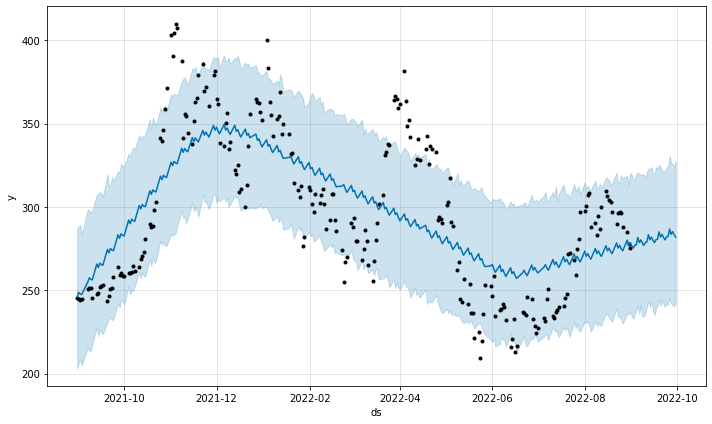

In [39]:
figure = m.plot(forecast, xlabel='ds', ylabel="y")

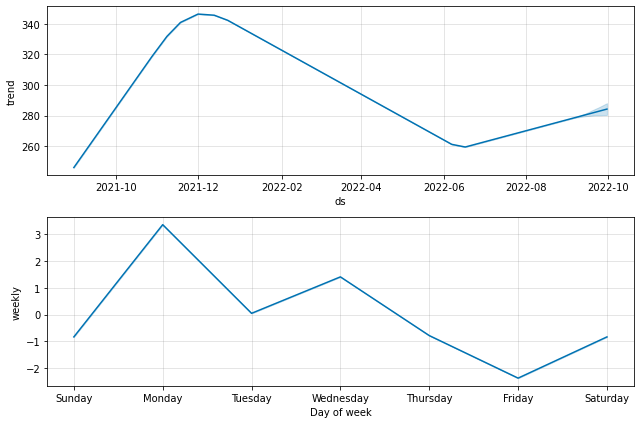

In [40]:
figure2 = m.plot_components(forecast)

In [41]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>